# ALY 6140 Capstone Project-Starbucks Stock Analysis
### Zihan Yu

## Project overview
   The data set retrieves and imports Starbucks stock data from 2011 to 2021 from investing.com（https://www.investing.com/equities/starbucks-corp). The original data set contains 7 variables: "Date","Open", "High", "Low", "Close", "Volume", and "Currency". After seeing the data set, the business problems I want to solve are
1. What is the trend of Starbucks stocks in the past decade?
2. What is the Starbucks stock price volatility changed during the past ten years?
3. What is the bullish peroid and bearish peroid of Starbucks stock?
4. How to use simple & exponential moving average to illustrate the trend of Starbucks stock? Which one is better?
5. What is the best machine leanring model to fit the stock market?
6. Which model could best predict future stock prices?

After cleaning up the data set, I visualized the data to solve problem 1, problem 2, and problem 3. Then use simple moving average and exponential moving average methods to identify the trend of Starbucks company. Finally, I explored which machine learning model could best fit Starbucks stock. I apllied the randomforest model, support vector machine model and neural network model to test, and finally found that the neural network model is most suitable for analyzing stock changes.


### Install packages

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install pandas_datareader
!pip install datetime
!pip install investpy
!pip install trendet
!pip install keras
!pip install tensorflow

### Import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import investpy as ip
import trendet as td
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
from sklearn.metrics import r2_score

## 1.Data Extraction

Due to the impact of the epidemic, the global coffee chain giant Starbucks (NASDAQ:SBUX) has been hit hard this year. The coffee retail group suffered heavy losses this year, because of the “social distancing” policy, people were forced to stay at home and the retail industry was largely closed. However, with the restart of the world's major economies, investors are paying close attention to the company's recovery speed. Therefore, I want to analyze the stock data of Starbucks from 2011 to the present to see the stock changes and future trends of Starbucks company. So I retrieves Starbucks stock data from 2011 to 2021 from investing.com（https://www.investing.com/equities/starbucks-corp).

In [243]:
starbucks_new = ip.get_stock_historical_data(stock='SBUX', country='united states', 
                                        from_date='26/02/2011', to_date='26/02/2021',)

In [244]:
starbucks_new

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2011-02-28,16.40,16.52,16.30,16.49,18027332,USD
2011-03-01,16.61,16.69,16.12,16.20,20470834,USD
2011-03-02,16.14,16.20,15.86,16.11,16253436,USD
2011-03-03,16.25,16.63,16.23,16.50,13107426,USD
2011-03-04,16.45,16.59,16.31,16.56,16241136,USD
...,...,...,...,...,...,...
2021-02-22,102.76,102.99,101.76,101.81,5211754,USD
2021-02-23,102.45,102.87,99.96,101.37,8740260,USD
2021-02-24,101.16,104.51,100.60,104.38,7542690,USD


## 2.Data Cleanup

#### 1.Drop duplicate data

The stock dataset is downloaded from the investing.com website, it should already be cleaned, but just in case, I still did data cleanup work. First, see if there is any duplicate data in the data set, and delete it if there are.

#### 2.Drop N/A data

First, delete the invalid data in the data set, and then use the is.null function to check whether the invalid data is deleted cleanly

#### 3.Add new columns

On the basis of the original data set, add a column of'price_change' to indicate the price changes at the opening and closing of the stock, and add another column of'Price_volatility' to indicate the difference between the highest value and the lowest value of the stock each day, and then use lambda function if else for analyze 'price_change' column, if price_change<0, it will display 'up', else it will be 'down'.

#### 4.Drop column

Currency is irrelevant to the entire analysis, so I delete this column

In [247]:
# drop duplicate
starbucks_new = starbucks_new.drop_duplicates(keep='first') 
# drop na
starbucks_new = starbucks_new.dropna()
#check if null
check = starbucks_new.isnull().any() 
# shape
starbucks_new.shape

(2518, 6)

In [172]:
# add column
starbucks_new['Price_Change'] = starbucks_new['Open'] -starbucks_new['Close'] 
starbucks_new['Price_volatility'] = starbucks_new['High']-starbucks_new['Low']
starbucks_new['Summary']=starbucks_new.Price_Change.apply(lambda x : 'down' if x > 0 else ('no_change' if x==0 else 'up'))

In [250]:
# drop column
starbucks_new=starbucks_new.drop(['Currency'],axis=1)

In [251]:
starbucks_new

,Open,High,Low,Close,Volume
Date,,,,,
2011-02-28,16.40,16.52,16.30,16.49,18027332
2011-03-01,16.61,16.69,16.12,16.20,20470834
2011-03-02,16.14,16.20,15.86,16.11,16253436
2011-03-03,16.25,16.63,16.23,16.50,13107426
2011-03-04,16.45,16.59,16.31,16.56,16241136
...,...,...,...,...,...
2021-02-22,102.76,102.99,101.76,101.81,5211754
2021-02-23,102.45,102.87,99.96,101.37,8740260
2021-02-24,101.16,104.51,100.60,104.38,7542690


## 3.Data Visualization

#### （1）Starbucks stock close price from 2011 to 2021
A line chart is generated based on the 'close' column. It can be seen from the graph that the overall trend of Starbucks stock price has risen steadily in the past ten years. According to the plot, Starbucks stock has a apprently down trend during March, 2020, which is the COVID-19 peroid. However, since the second half of 2020, the stock price has gradually risen. Perhaps due to the development of food delivery and the improvement of the epidemic situation, Starbucks' stock price has gradually risen.

<AxesSubplot:title={'center':'Starbucks stock close curve from 2011 to 2021'}, xlabel='Date', ylabel='Close'>

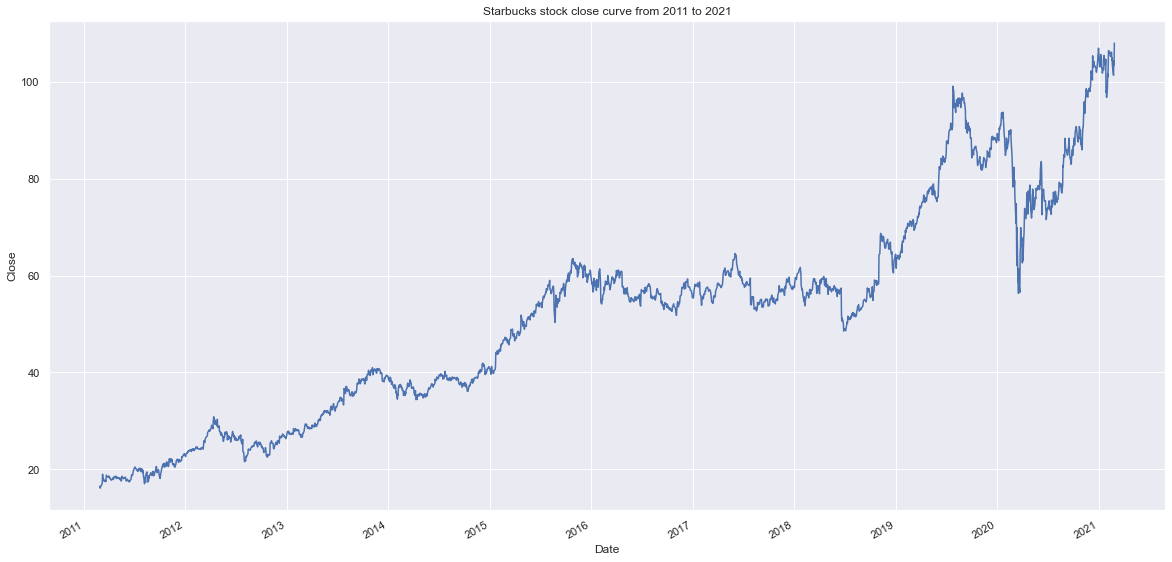

In [253]:
%matplotlib inline
plt.figure(figsize=(20,10))
vol = starbucks_new['Close']
plt.xlabel('Date')
plt.ylabel('Close')
plt.title("Starbucks stock close curve from 2011 to 2021")
vol.plot()

#### (2) Starbucks stock price_change curve from 2011 to 2021
This chart indicates the price change from 2011 to 2021. Hihger curve means the stock has more volatility. According to the plot, we can see the price start to volatilized since 2020, whch means the stock price of Starbucks start to be unstable than before.

<AxesSubplot:title={'center':'Starbucks stock Price_Change curve from 2011 to 2021'}, xlabel='Date', ylabel='Price_Change'>

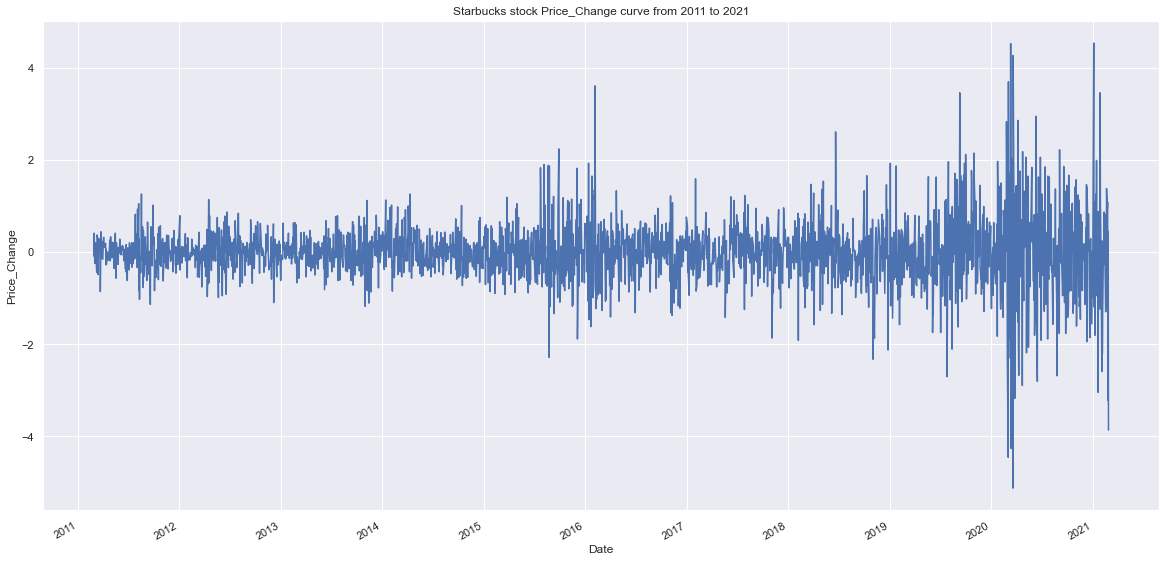

In [175]:
%matplotlib inline
plt.figure(figsize=(20,10))
Price_Change = starbucks_new['Price_Change']
plt.xlabel('Date')
plt.ylabel('Price_Change')
plt.title("Starbucks stock Price_Change curve from 2011 to 2021")
Price_Change.plot()

#### （3）bullish peroid and bearish peroid
By using trandet package, we are able to figure out the bullish peroid and bearish peroid in a time series. If a stock price has continuous increased for several days, then it will be viewed as bullish. Instead, it will be viewed as bearish peroid. This package will highlight as green for bullish and red for bearish. Therefore, we could easily figure out the bullish and bearish peroid from the plot.

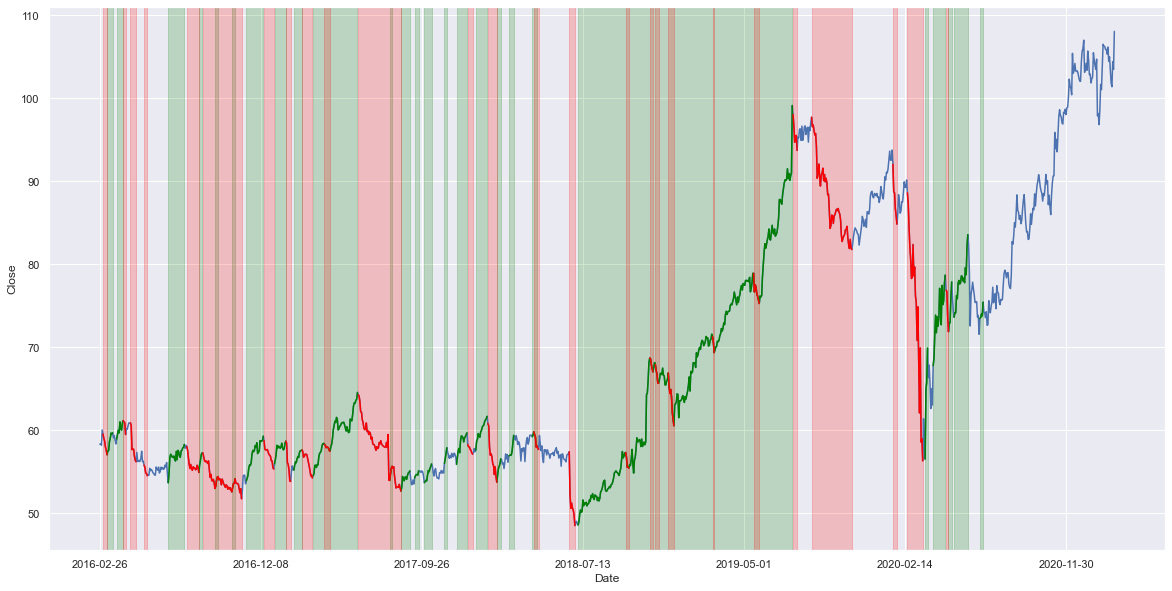

In [177]:
sns.set(style='darkgrid')
we = td.identify_all_trends(stock='SBUX', 
                                 country='united states', 
                                 from_date='26/02/2016', 
                                 to_date='26/02/2021',
                                 window_size=5,
                                 identify='both')
we.reset_index(inplace=True)

plt.figure(figsize=(20, 10))

ax = sns.lineplot(x=we.index, y=we['Close'])
ax.set(xlabel='Date')

labels = we['Up Trend'].dropna().unique().tolist()


for label in labels:
    sns.lineplot(x=we[we['Up Trend'] == label].index,
                 y=we[we['Up Trend'] == label]['Close'],
                 color='green')

    ax.axvspan(we[we['Up Trend'] == label].index[0],
               we[we['Up Trend'] == label].index[-1],
               alpha=0.2,
               color='green')

labels = we['Down Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=we[we['Down Trend'] == label].index,
                 y=we[we['Down Trend'] == label]['Close'],
                 color='red')

    ax.axvspan(we[we['Down Trend'] == label].index[0],
               we[we['Down Trend'] == label].index[-1],
               alpha=0.2,
               color='red')
               
locs, _ = plt.xticks()
labels = []

for position in locs[1:-1]:
    labels.append(str(we['Date'].loc[position])[:-9])

plt.xticks(locs[1:-1], labels)
plt.show()

## 4.Descriptive Analytics

#### Simple Moving Average 
The moving average can be used to identify interesting trends in the data. We can define a window to apply the moving average model to smooth the time series, and highlight different trends. In first curve, we used a specified time window(30) to display a moving average line of Starbucks. You could simply test others days by change the window variable value.

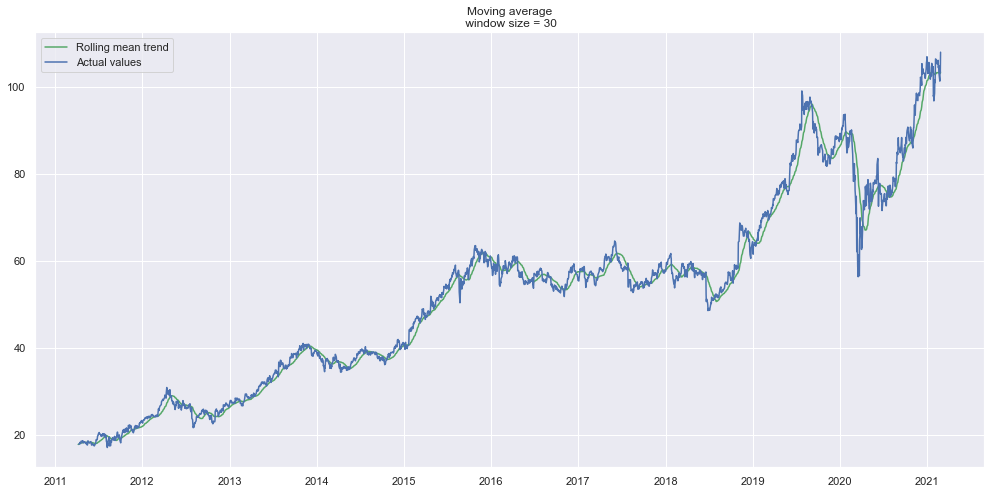

In [179]:
# simple moving average
def plot_moving_average(series, window, plot_intervals=False, scale=1.64):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 30 days (by week)
plot_moving_average(starbucks_new.Close, 30)

By changing the window time, there is a slightly change of plot. We could also add Upper and Lower bound

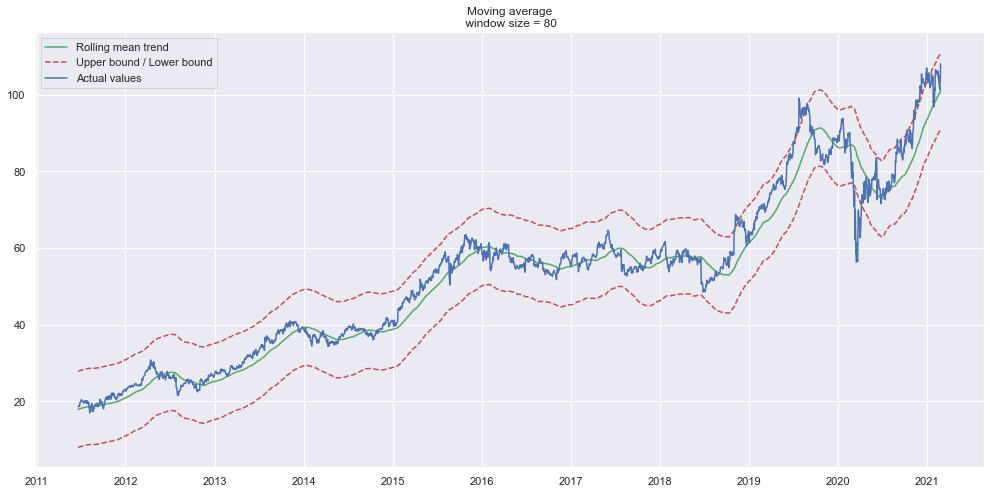

In [182]:
plot_moving_average(starbucks_new.Close, 80, plot_intervals=True)

#### Exponential smoothing
Exponential smoothing uses a similar logic to moving average, but this time, a different decreasing weight is assigned to each observations. In other words, less importance is given to observations as we move further from the present, which means a very old observations become less important. This is fit to the logic of stock market as well.

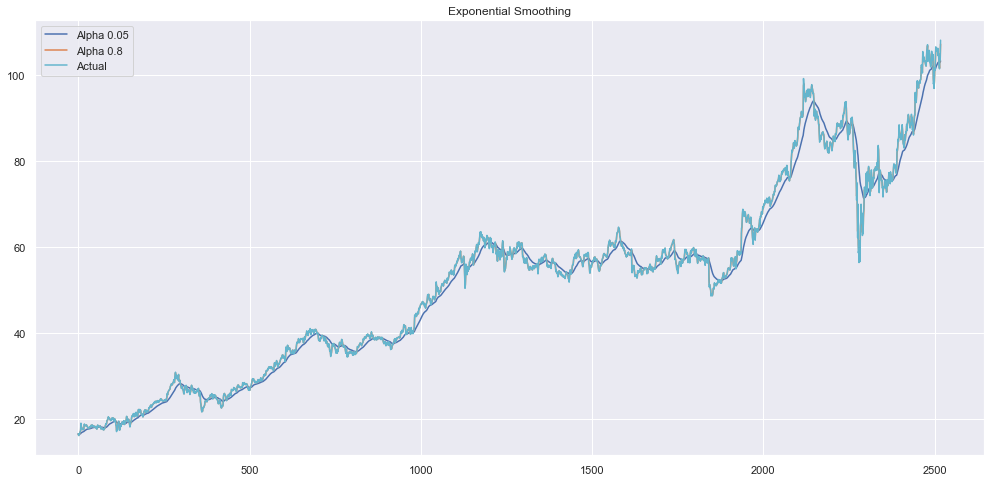

In [186]:
# exponential moving average
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(starbucks_new.Close, [0.05, 0.8])

## 5.Predictive Analytics

I'm trying to use machine learning model to predict the future price of Starbucks stock price. However, I'm not sure which model could best fit to stock price change. Therefore, I will apply to different model and compare prediction result with real result. Finally, I will select a best model to analysis the stock.

#### random forest model

In [194]:
starbucks_analysis =starbucks_new.drop(['Currency','Price_Change','Price_volatility','Summary','Volume'],axis=1)


In [245]:
split_date = pd.Timestamp('28-02-2019')
train = starbucks_analysis.loc[:split_date]
len(train)

2015

In [197]:
test=starbucks_analysis[2015:]
len(test)

503

<AxesSubplot:xlabel='Date'>

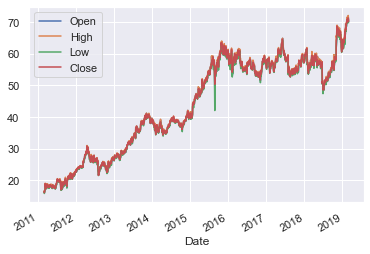

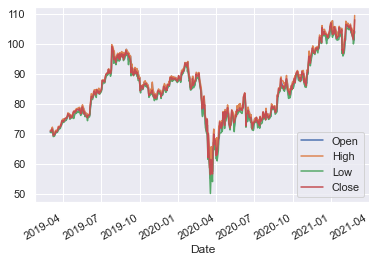

In [255]:
train.plot()
test.plot()

In order to make the data reasonable, I will normalized dataset before we apply it into the model. It makes all columns vary in the same range. After this step, I will eliminated the outlier value and make the data become more consistent. 

In [200]:
# normalize dataset
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [202]:
test_sc.shape

(503, 4)

In [204]:
train_sc_df = pd.DataFrame(train_sc, columns=['OPEN', 'HIGH', 'LOW', 'CLOSE'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['OPEN', 'HIGH', 'LOW', 'CLOSE'], index=test.index)

In [205]:
test_sc_df.drop(['OPEN', 'HIGH', 'LOW'], axis=1, inplace=True)
train_sc_df.drop(['OPEN', 'HIGH', 'LOW'], axis=1, inplace=True)

In [206]:
for s in range(1,2):
    train_sc_df['CLOSE+{}'.format(s)] = train_sc_df['CLOSE'].shift(-s)
    test_sc_df['CLOSE+{}'.format(s)] = test_sc_df['CLOSE'].shift(-s)

In [207]:
 test_sc_df

,CLOSE,CLOSE+1
Date,,
2019-03-01,0.991846,0.993658
2019-03-04,0.993658,1.005073
2019-03-05,1.005073,0.999456
2019-03-06,0.999456,0.987498
2019-03-07,0.987498,0.964849
...,...,...
2021-02-22,1.552818,1.544845
2021-02-23,1.544845,1.599384
2021-02-24,1.599384,1.582895


In [208]:
X_train = train_sc_df.dropna().drop('CLOSE+1', axis=1)
y_train = train_sc_df.dropna().drop('CLOSE', axis=1)

X_test = test_sc_df.dropna().drop('CLOSE+1', axis=1)
y_test = test_sc_df.dropna().drop('CLOSE', axis=1)

In [211]:
y_test

,CLOSE+1
Date,
2019-03-01,0.993658
2019-03-04,1.005073
2019-03-05,0.999456
2019-03-06,0.987498
2019-03-07,0.964849
...,...
2021-02-19,1.552818
2021-02-22,1.544845
2021-02-23,1.599384


In [217]:
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [218]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (2014 x 1)
Test size: (502 x 1)


In [219]:
# Create a model 
rf_model = RandomForestRegressor()

### Train it with training data

In [220]:
# Train the model
rf_model.fit(X_train, y_train)

<ipython-input-220-bf8d16876b22>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [221]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
rf_model.score(X_test, y_test)

-1.8569122699409069

In [222]:
y_pred = rf_model.predict(X_test)

In [227]:
y_test= pd.DataFrame(y_test)

In [228]:
y_pred_df = pd.DataFrame(y_pred, columns=['Close'], index=y_test.index)

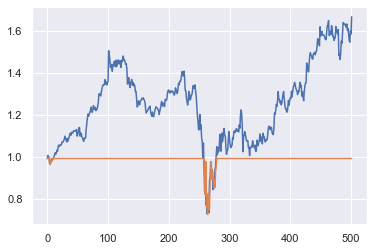

In [229]:
plt.plot(y_test)
plt.plot(y_pred_df)

According to the plot, we could see the prediction result(orange line) is completely different with the real result(blue line). Therefore, the random forest model isn't fit to my dataset. I have to give up the model and find a new one.

## Change to  support vector machine(SVM)

Change to SVM to figure out the best model

In [230]:
regressor = SVR(kernel='rbf')

In [231]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/Users/yzh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [234]:
y_pred_df = pd.DataFrame(y_pred, columns=['Close'], index=y_test.index)

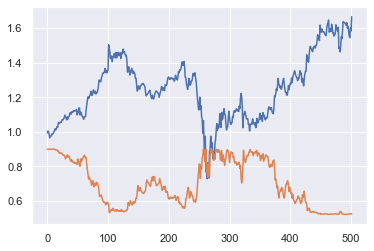

In [235]:
plt.plot(y_test)
plt.plot(y_pred_df)

According to the plot, the SVM model improved a little bit than random forest, but it doesn't have an accurate result compared with real result. Therefore, I need to find a new model to replace it.

## Change to  Neural Network

I try to use the Neural Network model to apply into my dataset. To increase our accuracy, I increased the intelligence of our neural network with 2 Hidden Layers and 50 neurons each, and a RELU activation function.

In [239]:
#K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=50, verbose=1)

Epoch 1/50
126/126 [==============================] - 0s 711us/step - loss: 0.0087
Epoch 2/50
126/126 [==============================] - 0s 622us/step - loss: 1.3142e-04
Epoch 3/50
126/126 [==============================] - 0s 622us/step - loss: 1.3167e-04
Epoch 4/50
126/126 [==============================] - 0s 666us/step - loss: 1.3761e-04
Epoch 5/50
126/126 [==============================] - 0s 814us/step - loss: 1.4031e-04
Epoch 6/50
126/126 [==============================] - 0s 796us/step - loss: 1.4881e-04
Epoch 7/50
126/126 [==============================] - 0s 799us/step - loss: 1.5036e-04
Epoch 8/50
126/126 [==============================] - 0s 635us/step - loss: 1.4580e-04
Epoch 9/50
126/126 [==============================] - 0s 612us/step - loss: 1.8447e-04
Epoch 10/50
126/126 [==============================] - 0s 609us/step - loss: 1.4597e-04
Epoch 11/50
126/126 [==============================] - 0s 616us/step - loss: 1.8140e-04
Epoch 12/50
126/126 [========================

In [241]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: 0.972103


R-Squared: 0.972103


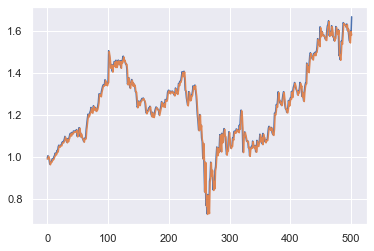

In [256]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

It seems the Nerual Network best fit to my dataset! Therefore, I believe this is the best model to predict the future stock price.

## Conclusion

Regarding to the 6 question ask at beginning, we could draw some conclusionL:
1. What is the trend of Starbucks stocks in zhe past decade?
2. What is the Starbucks stock price volatility changed during the past ten years?
3. What is the bullish peroid and bearish peroid of Starbucks stock?
4. How to use simple & exponential moving average to illustrate the trend of Starbucks stock? Which one is better?
5. What is the best machine leanring model to fit the stock market?
6. Which model could best predict future stock prices?

answer:
1. Starbucks stocks has gradually risen in past decades
2. The price of starbucks start to be volatile in recent years, so the price may change quickly than before
3. Based on red and green highlight, we could know the bullish and bearish peroid.
4. exponential moving average is better than simple moving average, because most recent data is more important than old data. 
5. Neural Network has better performence than SVM and random forest
6. By using neural Network, I could do some prediction, but it is not a best model, the reason is in next markdown cell.

#### Why this model needs to bed improved

The reason why so many machine learning models can't apply into stock market is we couldn't predict a dependent variable from the same variable that you will call independent in the days prior, unless you first process those historical values in some way. Obviously, it is not the price that decides what the price is going to be. It's market forces that shape the price. Therefore, to accurate predict a stock price, we should have other variables, check the correlation and put those variables into machine learning model to get a legitimate result.